DATA VISUALIZATION AND PREPROCESSING

i) LOAD DATA



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data1=pd.read_csv(r'/content/Churn_Modelling.csv')
data1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


UNIVARIANT ANALYSICS

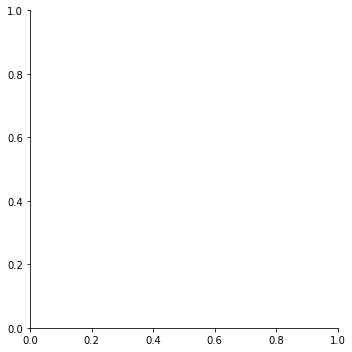

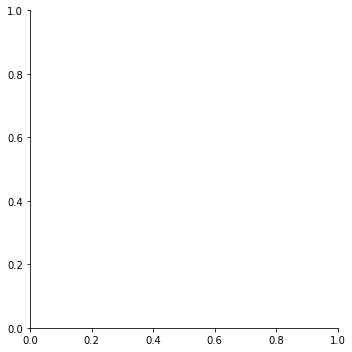

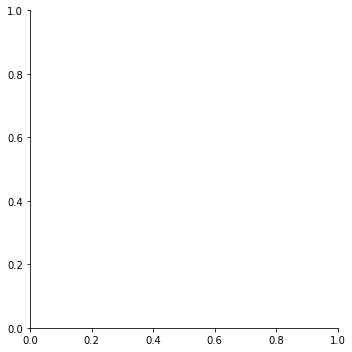

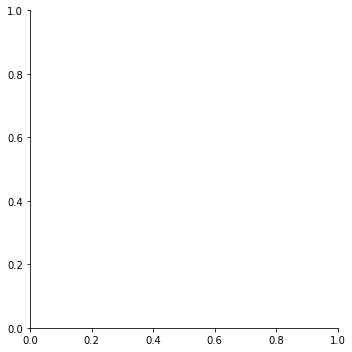

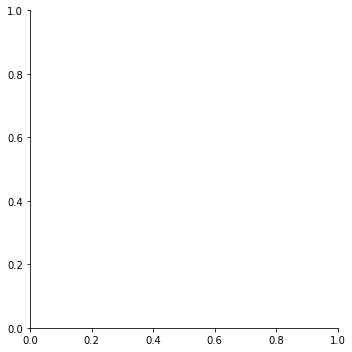

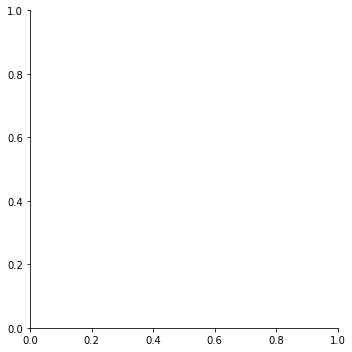

In [13]:
x=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']
for i in x:
    sns.displot(data1=data1[i],kde=True)

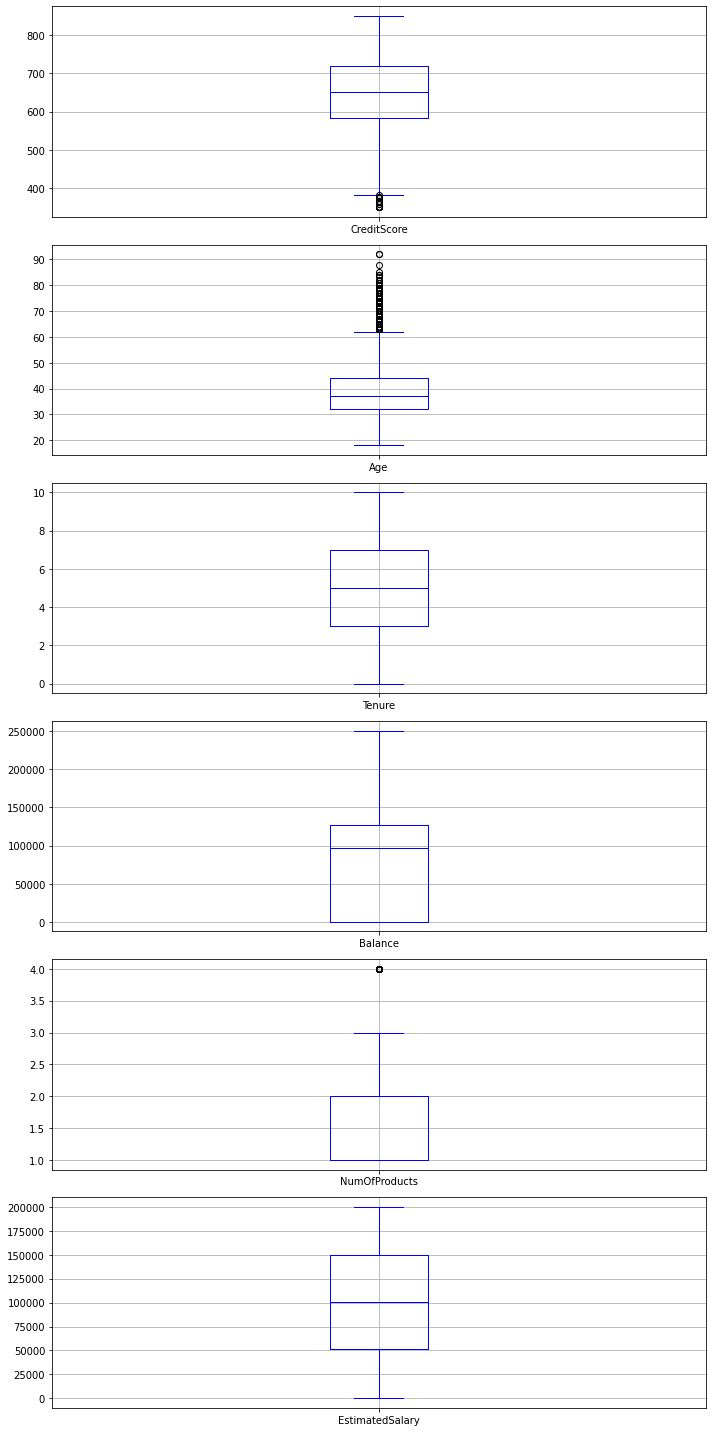

In [14]:
l=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(10,20))
data.boxplot(column=[l[0]],grid='False',color='blue',ax=ax1)
data.boxplot(column=[l[1]],grid='False',color='blue',ax = ax2)
data.boxplot(column=[l[2]],grid='False',color='blue',ax = ax3)
data.boxplot(column=[l[3]],grid='False',color='blue',ax = ax4)
data.boxplot(column=[l[4]],grid='False',color='blue',ax = ax5)
data.boxplot(column=[l[5]],grid='False',color='blue',ax = ax6)
plt.tight_layout()

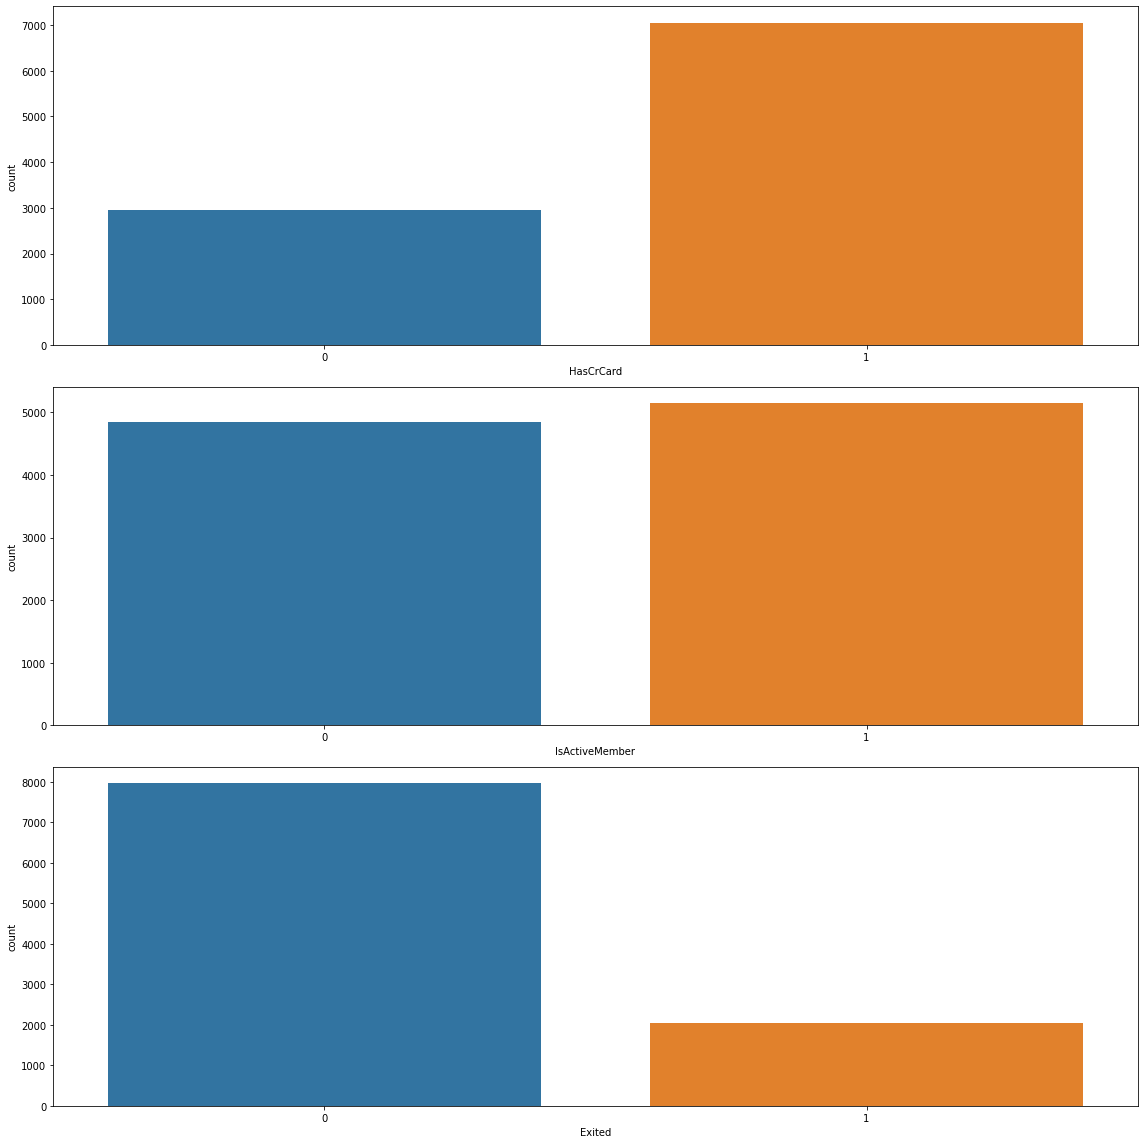

In [15]:
import warnings
warnings.filterwarnings("ignore")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16,16))
sns.countplot(data.HasCrCard,ax=ax1)
sns.countplot(data.IsActiveMember,ax=ax2)
sns.countplot(data.Exited,ax=ax3)
plt.tight_layout()

BI - VARIATE ANALYSIS

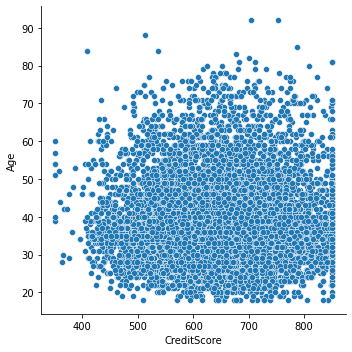

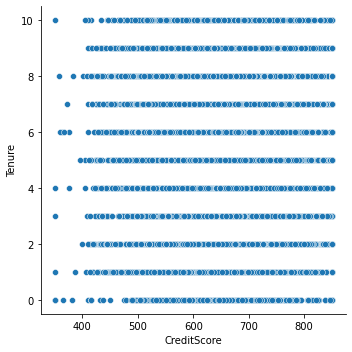

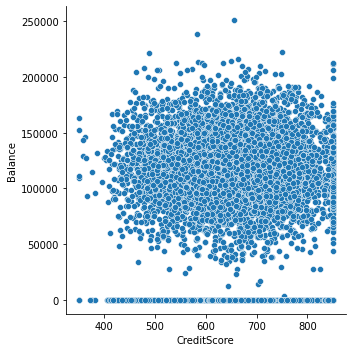

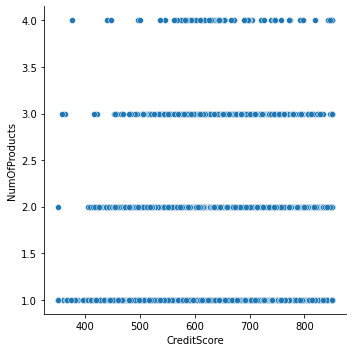

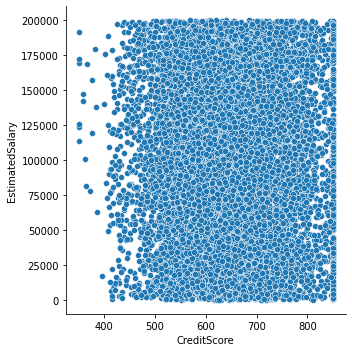

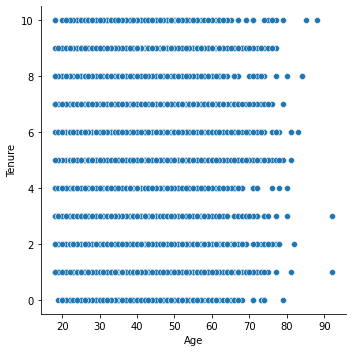

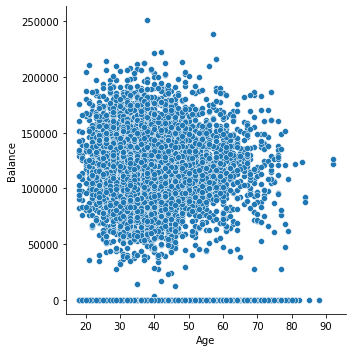

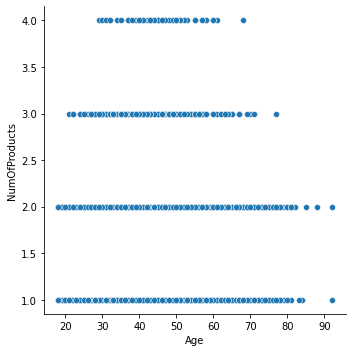

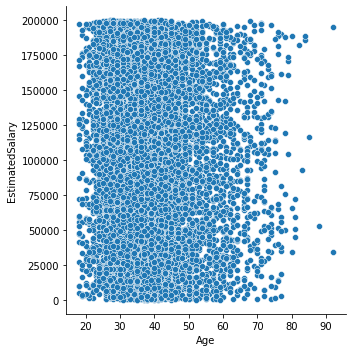

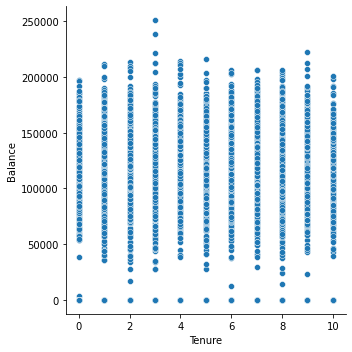

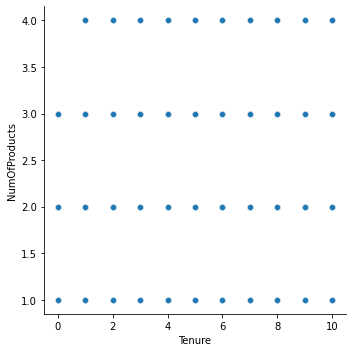

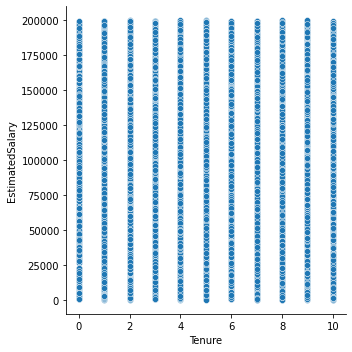

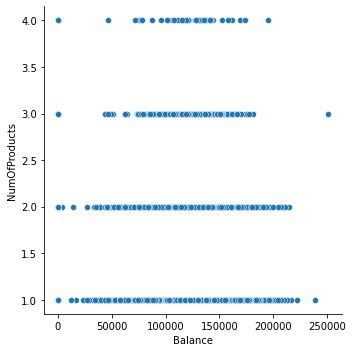

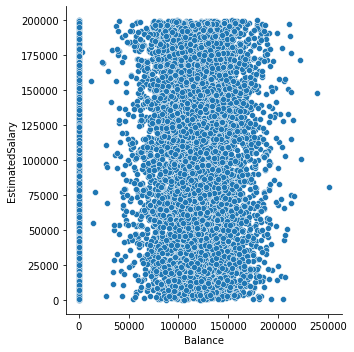

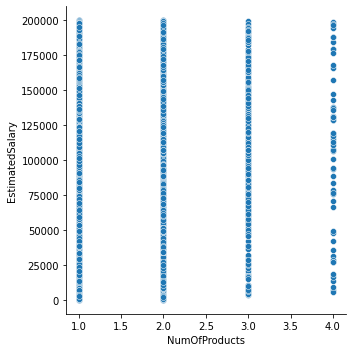

In [16]:
for i in range(len(x)-1):
    for j in range(i+1,len(x)):
        sns.relplot(x = x[i],y = x[j],data = data)

MULTI - VARIATE ANALYSIS

sns.catplot(x='Sex', y='Age', hue='HasCrCard', data=data)
sns.pairplot(data = data,hue='Exited')

Perform descriptive statistics on the dataset

In [17]:
data.describe()
data.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

Handle the Missing values.

In [18]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

Find the outliers and replace the outliers

In [19]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [20]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [21]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [22]:
x=['Balance','Age','CreditScore']
for i in x:
    percentile_least = data[i].quantile(0.1)
    percentile90 = data[i].quantile(0.9)
    data = data[(data[i]<percentile90)& (data[i]>percentile_least)]

In [23]:
data['CreditScore'].describe()

count    3354.000000
mean      651.885808
std        66.341508
min       522.000000
25%       601.000000
50%       652.000000
75%       705.000000
max       777.000000
Name: CreditScore, dtype: float64

In [24]:
data['Age'].describe()

count    3354.000000
mean       38.594812
std         6.171482
min        29.000000
25%        34.000000
50%        38.000000
75%        43.000000
max        53.000000
Name: Age, dtype: float64

In [25]:
data['Balance'].describe()

count      3354.000000
mean     111127.251270
std       23930.791436
min        3768.690000
25%       96579.825000
50%      113904.805000
75%      129621.140000
max      149238.970000
Name: Balance, dtype: float64

Check for Categorical columns and perform encoding.

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,645,608,2,0,41,1,83807.86,1,0,1,112542.58,0
5,6,15574012,302,645,2,1,44,8,113755.78,2,1,0,149756.71,1
10,11,15767821,109,528,0,1,31,6,102016.72,2,0,0,80181.12,0
15,16,15643966,561,616,1,1,45,3,143129.41,2,0,1,64327.26,0
26,27,15736816,1605,756,1,1,36,2,136815.64,1,1,1,170041.95,0


Split the data into dependent and independent variables.

In [27]:
data.shape

(3354, 14)

In [28]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

In [29]:
y.head()

1     0
5     1
10    0
15    0
26    0
Name: Exited, dtype: int64

In [30]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,2,15647311,645,608,2,0,41,1,83807.86,1,0,1,112542.58
5,6,15574012,302,645,2,1,44,8,113755.78,2,1,0,149756.71
10,11,15767821,109,528,0,1,31,6,102016.72,2,0,0,80181.12
15,16,15643966,561,616,1,1,45,3,143129.41,2,0,1,64327.26
26,27,15736816,1605,756,1,1,36,2,136815.64,1,1,1,170041.95


Scale the independent variables

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

Split the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train.shape

(2683, 13)

In [33]:
y_train.shape

(2683,)

In [34]:
x_test.shape

(671, 13)

In [35]:
y_test.shape

(671,)